In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import plotly.express as px
import plotly.graph_objs as go

In [25]:
df = pd.read_csv('bestsellers with categories.csv')

bestsellers_df = df.copy()
bestsellers_df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [26]:
bestsellers_df.info()
bestsellers_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


(550, 7)

In [27]:
bestsellers_df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [28]:
bestsellers_df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [29]:
print('{} авторов '.format(len(bestsellers_df['Author'].unique())))
print('{} книга '.format(len(bestsellers_df['Name'].unique())))

248 авторов 
351 книга 


In [30]:
# лидеры по количеству книг в датасете

top_authors = bestsellers_df['Author'].value_counts()
top_authors.head(5)

Jeff Kinney                           12
Rick Riordan                          11
Gary Chapman                          11
Suzanne Collins                       11
American Psychological Association    10
Name: Author, dtype: int64

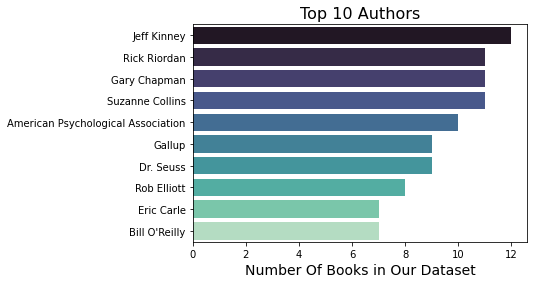

In [31]:
ax = sns.barplot(y=bestsellers_df['Author'].value_counts()[:10].index,x=bestsellers_df['Author'].value_counts()[:10].values,palette='mako')
ax.set_title('Top 10 Authors',fontsize=16)
ax.set_xlabel('Number Of Books in Our Dataset',fontsize=14)
plt.show()

In [32]:
# книги с плохим рейтингом

top_rating = bestsellers_df.groupby('Name')[['User Rating']].min()
top_rating.sort_values(by='User Rating',inplace=True,ascending=True)
top_rating.head(5)

,User Rating
Name,
The Casual Vacancy,3.3
Go Set a Watchman: A Novel,3.6
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series),3.8
The Goldfinch: A Novel (Pulitzer Prize for Fiction),3.9
Allegiant,3.9


In [33]:
bestsellers_df[bestsellers_df['Name'].isin(['The Casual Vacancy'])]

,Name,Author,User Rating,Reviews,Price,Year,Genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


In [34]:
# книги с самой высокой ценой

top_price = bestsellers_df.groupby('Name')[['Price']].max()
top_price.sort_values(by='Price',inplace=True,ascending=False)
top_price.head(5)

,Price
Name,
"Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5",105
The Twilight Saga Collection,82
Hamilton: The Revolution,54
The Book of Basketball: The NBA According to The Sports Guy,53
Harry Potter Paperback Box Set (Books 1-7),52


In [35]:
bestsellers_df[bestsellers_df['Name'].isin(['Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5'])]

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction


In [36]:
top_books = bestsellers_df.groupby('Name')[['Reviews']].max()
top_books.sort_values(by='Reviews',inplace=True,ascending=False)
top_books.head(5)

,Reviews
Name,
Where the Crawdads Sing,87841
The Girl on the Train,79446
Becoming,61133
Gone Girl,57271
The Fault in Our Stars,50482


In [37]:
bestsellers_df[bestsellers_df['Name'].isin(['Where the Crawdads Sing'])]

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [38]:
fig = px.pie(bestsellers_df,names='Genre',title='Share Of Different Geners in Dataset',hover_data=['Genre'],width=500, height=400)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

C:\Users\sai20\anaconda3\envs\untitled1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\sai20\anaconda3\envs\untitled1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='User Rating', ylabel='Price'>

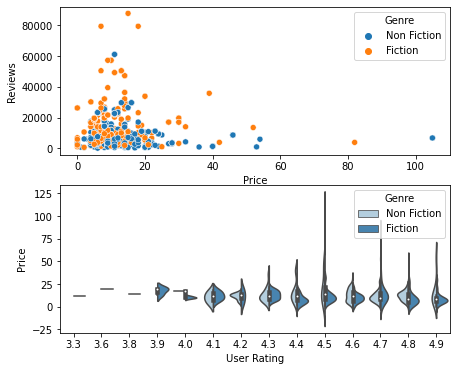

In [39]:
plt.figure(figsize=(7,6))
plt.subplot(2,1,1)
sns.scatterplot(bestsellers_df['Price'],bestsellers_df['Reviews'],hue=bestsellers_df['Genre'])
plt.subplot(2,1,2)
sns.violinplot(bestsellers_df['User Rating'],bestsellers_df['Price'],hue=bestsellers_df['Genre'],split=True,palette='Blues')

<AxesSubplot:title={'center':'Price changes Of Each Genre Over The Years'}, xlabel='Year', ylabel='Genre'>

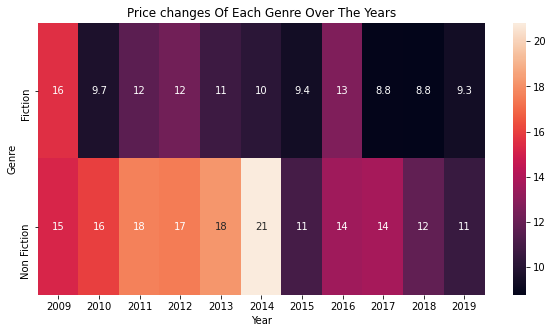

In [40]:
plt.figure(figsize=(10,5))
pivot = bestsellers_df.pivot_table(values='Price',columns='Year',index='Genre')
plt.title('Price changes Of Each Genre Over The Years')
sns.heatmap(pivot,annot=True)

C:\Users\sai20\anaconda3\envs\untitled1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



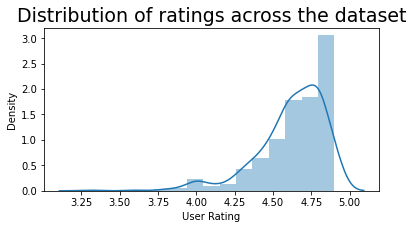

In [41]:
plt.figure(figsize=(6,3))
ax =sns.distplot(bestsellers_df['User Rating'],bins=15)
ax.set_title('Distribution of ratings across the dataset',fontsize=19)
plt.show()

C:\Users\sai20\anaconda3\envs\untitled1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



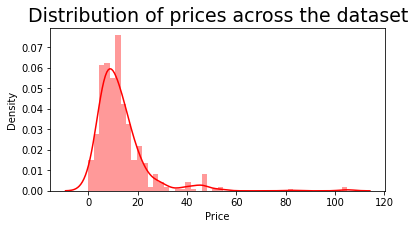

In [42]:
plt.figure(figsize=(6,3))
ax =sns.distplot(bestsellers_df['Price'],color='red')
ax.set_title('Distribution of prices across the dataset',fontsize=19)
plt.show()

C:\Users\sai20\anaconda3\envs\untitled1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



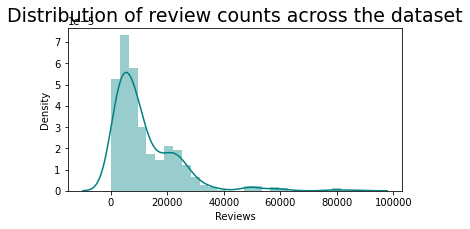

In [43]:
plt.figure(figsize=(6,3))
ax =sns.distplot(bestsellers_df['Reviews'],color='teal')
ax.set_title('Distribution of review counts across the dataset',fontsize=19)
plt.show()

In [44]:

gby_year = bestsellers_df.groupby('Year').mean()
gby_year_median = bestsellers_df.groupby('Year').median()

tr1 = go.Scatter(x=gby_year.index,y=gby_year['Price'],name='Mean')
tr2 = go.Scatter(x=gby_year_median.index,y=gby_year_median['Price'],name='Median')


layout = dict(title='Average Book Price Over The Years',yaxis_title='Mean Price',xaxis_title='Year',autosize=False,width=700,height=400,)
fig = go.Figure(data=[tr1,tr2],layout=layout)

fig.show()

In [45]:
tr1 = go.Scatter(x=gby_year.index,y=gby_year['Reviews'],name='Mean')
tr2 = go.Scatter(x=gby_year_median.index,y=gby_year_median['Reviews'],name='Median')


layout = dict(title='Average Book Review Count Over The Years',yaxis_title='Mean Number Of Reviews',xaxis_title='Year',autosize=False,width=700,height=400,)
go.Figure(data=[tr1,tr2],layout=layout)



In [46]:
tr1 = go.Scatter(x=gby_year.index,y=gby_year['User Rating'],name='Mean')
tr2 = go.Scatter(x=gby_year_median.index,y=gby_year_median['User Rating'],name='Median')

layout = dict(title='Average Book User Rating Over The Years',yaxis_title='Mean Rating',xaxis_title='Year',autosize=False,width=700,height=400,)
go.Figure(data=[tr1,tr2],layout=layout)
